# Chapter 2

## Question 5

In [2]:
import pandas as pd
import numpy as np
import datetime

data = pd.read_excel("data_2/CH2_AGF_data.xls", 
                     header=1, 
                     parse_dates=True,
                     dtype={"Time":datetime.time}, 
                     index_col="Time")
data.head()

,Trade Size (|qt|),Price (pt),Direction (dt),Bid(bt),Ask (at)
Time,,,,,
2020-04-07 09:06:04,20,66.7000,-1,66.90,67.00
2020-04-07 09:06:11,25,66.6360,-1,66.65,66.70
2020-04-07 09:06:26,18,66.6000,-1,66.60,66.65
2020-04-07 09:07:18,273,66.4163,-1,66.50,66.55
2020-04-07 09:07:36,27,66.5500,1,66.15,66.55


### Part A

In [3]:
data["absolute_spread"] = data["Ask (at)"] - data["Bid(bt)"]
data["midpoint"] = (data["Ask (at)"] + data["Bid(bt)"])/2
data["relative_spread"] = data["absolute_spread"] / data["midpoint"]
data["log_spread"] = data["Ask (at)"].apply(np.log) - data["Bid(bt)"].apply(np.log)
print("Average absolute spread: {}, \naverage relative spread: {}, \naverage log spread {}".format(data["absolute_spread"].mean(), 
                                                                                               data["relative_spread"].mean(), 
                                                                                               data["log_spread"].mean()))
data.head()

Average absolute spread: 0.10616570327552977, 
average relative spread: 0.0016086984772629698, 
average log spread 0.0016086998354762725


,Trade Size (|qt|),Price (pt),Direction (dt),Bid(bt),Ask (at),absolute_spread,midpoint,relative_spread,log_spread
Time,,,,,,,,,
2020-04-07 09:06:04,20,66.7000,-1,66.90,67.00,0.10,66.950,0.001494,0.001494
2020-04-07 09:06:11,25,66.6360,-1,66.65,66.70,0.05,66.675,0.000750,0.000750
2020-04-07 09:06:26,18,66.6000,-1,66.60,66.65,0.05,66.625,0.000750,0.000750
2020-04-07 09:07:18,273,66.4163,-1,66.50,66.55,0.05,66.525,0.000752,0.000752
2020-04-07 09:07:36,27,66.5500,1,66.15,66.55,0.40,66.350,0.006029,0.006029


In [4]:
for group in data["absolute_spread"].groupby(pd.Grouper(freq='0.5H', closed='left')):
    print("Average starting at", group[0].time(), ":", sum(group[1])/len(group[1]))

Average starting at 09:00:00 : 0.11363636363636234
Average starting at 09:30:00 : 0.11428571428571456
Average starting at 10:00:00 : 0.10657894736842248
Average starting at 10:30:00 : 0.0874999999999974
Average starting at 11:00:00 : 0.09393939393939205
Average starting at 11:30:00 : 0.10641025641025618
Average starting at 12:00:00 : 0.2052631578947379
Average starting at 12:30:00 : 0.09705882352941127
Average starting at 13:00:00 : 0.08103448275861805
Average starting at 13:30:00 : 0.1280000000000024
Average starting at 14:00:00 : 0.1153846153846132
Average starting at 14:30:00 : 0.0802631578947334
Average starting at 15:00:00 : 0.07586206896552077
Average starting at 15:30:00 : 0.11122448979592132
Average starting at 16:00:00 : 0.12241379310344817
Average starting at 16:30:00 : 0.1118644067796602
Average starting at 17:00:00 : 0.10000000000000019


### Part B

In [5]:
data["absolute_half_spread"] = data["Ask (at)"] - data["midpoint"]
data["relative_half_spread"] = data["absolute_half_spread"] / data["midpoint"]
data["log_half_spread"] = data["Ask (at)"].apply(np.log) - data["midpoint"].apply(np.log)

print("Average absolute spread: {}, \naverage relative spread: {}, \naverage log spread {}".format(data["absolute_half_spread"].mean(), 
                                                                                               data["relative_half_spread"].mean(), 
                                                                                               data["log_half_spread"].mean()))

data[["absolute_half_spread", "relative_half_spread", "log_half_spread"]].head()

Average absolute spread: 0.05308285163776443, 
average relative spread: 0.000804349238631478, 
average log spread 0.0008038286971465961


,absolute_half_spread,relative_half_spread,log_half_spread
Time,,,
2020-04-07 09:06:04,0.050,0.000747,0.000747
2020-04-07 09:06:11,0.025,0.000375,0.000375
2020-04-07 09:06:26,0.025,0.000375,0.000375
2020-04-07 09:07:18,0.025,0.000376,0.000376
2020-04-07 09:07:36,0.200,0.003014,0.003010


### Part C

In [6]:
print("Day vwap =", np.mean(data["Trade Size (|qt|)"] * data['Price (pt) '])/ data['Trade Size (|qt|)'].mean())
for group in data.groupby(pd.Grouper(freq='3H', closed='right')):
    print("Total VWAP starting at", group[0].time(), ":", np.mean(group[1]["Trade Size (|qt|)"] * group[1]['Price (pt) '])/group[1]['Trade Size (|qt|)'].mean())
    sell = group[1].loc[group[1]["Direction (dt) "] == -1, ["Trade Size (|qt|)", 'Price (pt) ']]
    print("Ask VWAP starting at", group[0].time(), ":", np.mean(sell["Trade Size (|qt|)"] * sell['Price (pt) '])/sell['Trade Size (|qt|)'].mean())
    buy = group[1].loc[group[1]["Direction (dt) "] == 1, ["Trade Size (|qt|)", 'Price (pt) ']]
    print("Bid VWAP starting at", group[0].time(), ":", np.mean(buy["Trade Size (|qt|)"] * buy['Price (pt) '])/buy['Trade Size (|qt|)'].mean(), "\n")

Day vwap = 65.9762592589728
Total VWAP starting at 09:00:00 : 66.00037952521801
Ask VWAP starting at 09:00:00 : 65.90238640544808
Bid VWAP starting at 09:00:00 : 66.09206370221254 

Total VWAP starting at 12:00:00 : 66.05732484327085
Ask VWAP starting at 12:00:00 : 65.99628722148495
Bid VWAP starting at 12:00:00 : 66.10385337566221 

Total VWAP starting at 15:00:00 : 65.93996300616956
Ask VWAP starting at 15:00:00 : 65.85991259218804
Bid VWAP starting at 15:00:00 : 66.08637827551495 



### Part D

In [7]:
data["price -1"] = data["Price (pt) "].shift()
data["d_price"] = data["Price (pt) "] - data["price -1"]
data["d_price -1"] = data["d_price"].shift()
print("Roll's measure = ", 2 * np.sqrt(-1 * np.mean((data["d_price"] - data["d_price"].mean()) * data["d_price -1"] - data["d_price -1"].mean())))

Roll's measure =  0.10688644184158194


In [8]:
data["ln price -1"] = data["Price (pt) "].apply(np.log).shift()
data["ln d_price"] = data["Price (pt) "].apply(np.log) - data["ln price -1"]
data["ln d_price -1"] = data["ln d_price"].shift()
print("Roll's measure = ", 2 * np.sqrt(-1 * np.mean((data["ln d_price"] - data["ln d_price"].mean()) * data["ln d_price -1"] - data["ln d_price -1"].mean())))

Roll's measure =  0.0028872720462376398


### Part E

In [9]:
midpoint_change = []
index = []
total_order_flow = data["Trade Size (|qt|)"].sum()
fraction_order_flow = []
for group in data.groupby(pd.Grouper(freq='15T', closed='right')):
    delta = np.round(group[1]["midpoint"][0] - group[1]["midpoint"][-1], decimals=2)
    print("Change in midpoint starting at", group[0], ":", delta)
    midpoint_change.append(delta)
    index.append(group[0])
    fraction_order_flow.append((group[1]["Trade Size (|qt|)"] * group[1]["Direction (dt) "]).sum() / total_order_flow)

Change in midpoint starting at 2020-04-07 09:00:00 : 0.6
Change in midpoint starting at 2020-04-07 09:15:00 : 0.2
Change in midpoint starting at 2020-04-07 09:30:00 : 0.15
Change in midpoint starting at 2020-04-07 09:45:00 : -0.17
Change in midpoint starting at 2020-04-07 10:00:00 : 0.08
Change in midpoint starting at 2020-04-07 10:15:00 : 0.42
Change in midpoint starting at 2020-04-07 10:30:00 : 0.03
Change in midpoint starting at 2020-04-07 10:45:00 : 0.1
Change in midpoint starting at 2020-04-07 11:00:00 : -0.02
Change in midpoint starting at 2020-04-07 11:15:00 : -0.72
Change in midpoint starting at 2020-04-07 11:30:00 : -0.22
Change in midpoint starting at 2020-04-07 11:45:00 : 0.42
Change in midpoint starting at 2020-04-07 12:00:00 : 0.22
Change in midpoint starting at 2020-04-07 12:15:00 : -0.43
Change in midpoint starting at 2020-04-07 12:30:00 : 0.12
Change in midpoint starting at 2020-04-07 12:45:00 : 0.25
Change in midpoint starting at 2020-04-07 13:00:00 : 0.15
Change in mi

In [10]:
new_data = pd.DataFrame(data=zip(midpoint_change, fraction_order_flow), 
                        index=index, 
                        columns=["midpoint_change", "order_flow"])
new_data.head()

,midpoint_change,order_flow
2020-04-07 09:00:00,0.60,-0.001026
2020-04-07 09:15:00,0.20,0.001441
2020-04-07 09:30:00,0.15,-0.006406
2020-04-07 09:45:00,-0.17,0.006327
2020-04-07 10:00:00,0.08,0.006310


In [11]:
import statsmodels.formula.api as sm
formula = "midpoint_change ~ order_flow - 1"
reg = sm.ols(formula, new_data).fit()
reg.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        midpoint_change   R-squared (uncentered):                   0.198
Model:                            OLS   Adj. R-squared (uncentered):              0.174
Method:                 Least Squares   F-statistic:                              8.148
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                     0.00739
Time:                        10:48:44   Log-Likelihood:                        -0.79268
No. Observations:                  34   AIC:                                      3.585
Df Residuals:                      33   BIC:                                      5.112
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
order_flow    -4.6202      1.619     -2.854      0.007      -7.913      -1.327
==============================================================================
Omnibus:                        1.489   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                0.552
Skew:                          -0.167   Prob(JB):                        0.759
Kurtosis:                       3.528   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The parameter $\lambda$ is estimated to be $-4.602$ with a $t-$stat of $-2.854$ which is statistically significant. A 1% increase/decrease in relative order flow would effect a 4.602% decrease/increase in the midpoint price.

## Question 6 

In [12]:
data = pd.read_excel("data_2/Ch2_KrispyKreme_raw_data.xls", 
                     header=1, 
                     parse_dates=True,
                     dtype={"Time":datetime.time}, 
                     index_col="Time")
data.head()

,Type,Bid (bt),Ask (at),Price (pt),Bid Size,Ask Size,Trade Size (|qt|),Unnamed: 8
Time,,,,,,,,
2020-04-07 09:02:25,0,2.66,3.89,NaN,100.0,1000.0,NaN,NaN
2020-04-07 09:17:40,0,2.65,3.33,NaN,100.0,100.0,NaN,NaN
2020-04-07 09:17:40,0,2.67,3.54,NaN,3400.0,5000.0,NaN,NaN
2020-04-07 09:21:21,0,2.66,3.89,NaN,100.0,1000.0,NaN,NaN
2020-04-07 09:25:01,0,2.67,3.89,NaN,3400.0,1000.0,NaN,NaN


### Part A

In [13]:
data["absolute_spread"] = data["Ask (at)"] - data["Bid (bt)"]
data["midpoint"] = (data["Ask (at)"] + data["Bid (bt)"]) / 2
data["relative_spread"] = data["absolute_spread"] / data["midpoint"]
data["log_spread"] = data["Ask (at)"].apply(np.log) - data["Bid (bt)"].apply(np.log)
data.head()

,Type,Bid (bt),Ask (at),Price (pt),Bid Size,Ask Size,Trade Size (|qt|),Unnamed: 8,absolute_spread,midpoint,relative_spread,log_spread
Time,,,,,,,,,,,,
2020-04-07 09:02:25,0,2.66,3.89,NaN,100.0,1000.0,NaN,NaN,1.23,3.275,0.375573,0.380083
2020-04-07 09:17:40,0,2.65,3.33,NaN,100.0,100.0,NaN,NaN,0.68,2.990,0.227425,0.228413
2020-04-07 09:17:40,0,2.67,3.54,NaN,3400.0,5000.0,NaN,NaN,0.87,3.105,0.280193,0.282048
2020-04-07 09:21:21,0,2.66,3.89,NaN,100.0,1000.0,NaN,NaN,1.23,3.275,0.375573,0.380083
2020-04-07 09:25:01,0,2.67,3.89,NaN,3400.0,1000.0,NaN,NaN,1.22,3.280,0.371951,0.376331


In [14]:
avg_absolute_spread = []
index = []
for group in data.groupby(pd.Grouper(freq="30T")):
    group_data = group[1]
    index.append(group[0])
    avg_absolute_spread.append(group_data["absolute_spread"].mean())
    
spread_evolution = pd.DataFrame(data=avg_absolute_spread, index=index, columns=["avg. absolute spread"])
fig = spread_evolution.plot()
    

### Part B

In [15]:
data = data.fillna(method='ffill')
transaction_data = data.loc[data["Type"] == 1, data.columns.values]
transaction_data["most_recent_trans"] = transaction_data["Price (pt)"].shift()
transaction_data["Unnamed: 8"] = np.where(transaction_data["Price (pt)"] > transaction_data["midpoint"], 
                                          1, 
                                          np.where(transaction_data["Price (pt)"] < transaction_data["midpoint"], 
                                                   -1, 
                                                   np.where(transaction_data["Price (pt)"] > transaction_data["most_recent_trans"], 
                                                            1, 
                                                            -1
                                                           )
                                                  )
                                         )
transaction_data.head()

,Type,Bid (bt),Ask (at),Price (pt),Bid Size,Ask Size,Trade Size (|qt|),Unnamed: 8,absolute_spread,midpoint,relative_spread,log_spread,most_recent_trans
Time,,,,,,,,,,,,,
2020-04-07 09:30:02,1,2.81,3.24,2.99,100.0,100.0,500.0,-1,0.43,3.025,0.142149,0.142389,NaN
2020-04-07 09:30:02,1,2.81,3.24,2.99,100.0,100.0,500.0,-1,0.43,3.025,0.142149,0.142389,2.99
2020-04-07 09:32:28,1,2.88,3.15,3.03,100.0,100.0,2400.0,1,0.27,3.015,0.089552,0.089612,2.99
2020-04-07 09:33:35,1,3.01,3.03,3.03,1600.0,700.0,100.0,1,0.02,3.020,0.006623,0.006623,3.03
2020-04-07 09:33:38,1,3.01,3.03,3.02,100.0,100.0,100.0,1,0.02,3.020,0.006623,0.006623,3.03


## Question 7

### Part A

In [16]:
transaction_data["absolute_half_spread"] = transaction_data["absolute_spread"] / 2 
transaction_data["relative_half_spread"] = transaction_data["relative_spread"] / 2 
transaction_data["log_half_spread"] = transaction_data["Ask (at)"].apply(np.log) \
                                    - transaction_data["midpoint"].apply(np.log)
data = transaction_data[["Bid (bt)", 
                         "Ask (at)", 
                         "Price (pt)", 
                         "Trade Size (|qt|)",
                         "Unnamed: 8", 
                         "absolute_half_spread", 
                         "relative_half_spread", 
                         "log_half_spread"
                        ]
                       ].rename(columns = {"Bid (bt)": "bid", 
                                           "Ask (at)": "ask", 
                                           "Price (pt)": "price",
                                           "Trade Size (|qt|)": "size",
                                           "Unnamed: 8": "direction"
                                          }
                               )
data.head()

,bid,ask,price,size,direction,absolute_half_spread,relative_half_spread,log_half_spread
Time,,,,,,,,
2020-04-07 09:30:02,2.81,3.24,2.99,500.0,-1,0.215,0.071074,0.068662
2020-04-07 09:30:02,2.81,3.24,2.99,500.0,-1,0.215,0.071074,0.068662
2020-04-07 09:32:28,2.88,3.15,3.03,2400.0,1,0.135,0.044776,0.043803
2020-04-07 09:33:35,3.01,3.03,3.03,100.0,1,0.010,0.003311,0.003306
2020-04-07 09:33:38,3.01,3.03,3.02,100.0,1,0.010,0.003311,0.003306


### Part B

In [17]:
vwap = (data["price"] * data["size"]).sum() / data["size"].sum()

data["buy_size"] = np.where(data["direction"] == 1, data["size"], 0)
data["sell_size"] = np.where(data["direction"] == -1, data["size"], 0)

vwap_b = (data["price"] * data["buy_size"]).sum() / data["buy_size"].sum()
vwap_s = (data["price"] * data["sell_size"]).sum() / data["sell_size"].sum()

print(f"VWAP: {vwap:.4f}, VWAP Buy: {vwap_b:.4f}, VWAP Sell: {vwap_s:.4f}")

VWAP: 3.0534, VWAP Buy: 3.0647, VWAP Sell: 3.0454


In [18]:
for group in data.groupby(pd.Grouper(freq="3H", closed="left")):
    local = group[1].copy()
    local["buy_size"] = np.where(local["direction"] == 1, local["size"], 0)
    local["sell_size"] = np.where(local["direction"] == -1, local["size"], 0)
    
    vwap = (local["price"] * local["size"]).sum() / local["size"].sum()

    vwap_b = (local["price"] * local["buy_size"]).sum() / local["buy_size"].sum()
    vwap_s = (local["price"] * local["sell_size"]).sum() / local["sell_size"].sum()

    print(f"Time: {group[0]}, VWAP: {vwap:.4f}, VWAP Buy: {vwap_b:.4f}, VWAP Sell: {vwap_s:.4f}")

Time: 2020-04-07 09:00:00, VWAP: 3.0180, VWAP Buy: 3.0357, VWAP Sell: 3.0036
Time: 2020-04-07 12:00:00, VWAP: 3.0868, VWAP Buy: 3.0932, VWAP Sell: 3.0812
Time: 2020-04-07 15:00:00, VWAP: 3.0689, VWAP Buy: 3.0801, VWAP Sell: 3.0649


### Part C

In [23]:
data["lagged_price"] = data["price"].shift()
rolls_estimate = 2 * np.sqrt(data["price"].cov(data["lagged_price"]))

data["log_price"] = data["price"].apply(np.log)
data["lagged_log_price"] = data["log_price"].shift()
rolls_estimate_log = 2 * np.sqrt(data["log_price"].cov(data["lagged_log_price"]))

print(rolls_estimate, rolls_estimate_log)

0.09289507177090663 0.03060879601340561


In [37]:
lag_log_p = []
log_p = []
lag_p = []
p = []
for group in data.groupby(pd.Grouper(freq="15T", closed="left")):
    lag_log_p.append(group[1]["lagged_log_price"][-1])
    log_p.append(group[1]["log_price"][-1])
    lag_p.append(group[1]["lagged_price"][-1])
    p.append(group[1]["price"][-1])
    
    
rolls_estimate_log_15 = 2 * np.sqrt(np.cov((lag_log_p, log_p))[0][1])
rolls_estimate_15 = 2* np.sqrt(np.cov((lag_p, p))[0][1])

print(rolls_estimate_15, rolls_estimate_log_15)

0.09230911280958287 0.030409739390525905


### Part D

In [55]:
data["midprice"] = (data["ask"] + data["bid"]) / 2

midprices = []
cumm_flow = []
index = []

mid = data["midprice"][0]
for group in data.groupby(pd.Grouper(freq="15T", closed="left")):
    midprices.append(round(group[1]["midprice"][-1] - mid, 4))
    cumm_flow.append(round((group[1]["price"] * group[1]["direction"]).sum(), 4))
    mid = group[1]["midprice"][-1]
    index.append(group[0])
    


new_data = pd.DataFrame(data=zip(midprices, cumm_flow), 
                        index=index, 
                        columns=["midpoint_change", "cumm_flow"])

formula = "midpoint_change ~ cumm_flow - 1"
reg = sm.ols(formula, new_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        midpoint_change   R-squared (uncentered):                   0.069
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              1.857
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.185
Time:                        11:19:05   Log-Likelihood:                          19.952
No. Observations:                  26   AIC:                                     -37.90
Df Residuals:                      25   BIC:                                     -36.65
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cumm_flow      0.0004      0.000      1.363      0.185      -0.000       0.001
==============================================================================
Omnibus:                       17.527   Durbin-Watson:                   2.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.343
Skew:                          -0.384   Prob(JB):                     1.08e-19
Kurtosis:                      11.946   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 8

### Part A

The optimal return would be $q(m_t - m_0)$. As we must choose some proportion $k$ of the order to purchase, and purchase at an average price of $\bar{p} = m_o + \lambda k q$, the actual return is $kq(m_t - \bar{p})$. This gives a shortfall of:
$$\begin{align} 
\text{Shortfall} &= q(m_t - m_0) - kq(m_t - \bar{p}) \\
&= qm_t - qm_0 - kqm_t + kq\bar{p} \\ 
&= qm_t - qm_0 - kqm_t + kq(m_0 + \lambda kq) \\
&= qm_t - qm_0 - kqm_t + kqm_0 + \lambda k^2 q^2 \\
&= q(1-k)(m_t - m_0) + \lambda k^2 q^2
\end{align} $$

### Part B

$$\begin{align} 
\frac{d \text{Shortfall}}{d k} &\equiv 0 \\ 
&= - qm_t + qm_0 + 2\lambda k q^2 \\
k^* &= \frac{m_t - m_0}{2\lambda q}
\end{align}$$

### Part C

$$\begin{align}
\frac{\partial k^*}{\partial (m_t - m_0)} &> 0\\
\frac{\partial k^*}{\partial q} &< 0\\
\frac{\partial k^*}{\partial \lambda} &< 0\\
\end{align}$$

# Chapter 3

## Question 1

### Part A

$$\begin{align}
a_t &= \mu_{t-1} + \frac{k}{\bar{q}} + s_t^a \\
b_t &= \mu_{t-1} - \frac{k}{\bar{q}} - s_t^b \\ 
S_t &\equiv 2\frac{k}{\bar{q}} + s_t^a + s_t^b
\end{align}$$

Where $\bar{q}$ is the average order size.

## Part B

As above:
$$\begin{align}
a_t &= \mu_{t-1} + \frac{kp}{\bar{q}} + s_t^a \\
b_t &= \mu_{t-1} - \frac{kp}{\bar{q}} - s_t^b \\ 
S_t &\equiv 2\frac{kp}{\bar{q}} + s_t^a + s_t^b
\end{align}$$


### Part C

Within this framework, the observations would imply that order-processing costs are constant per dollar of value traded.

## Question 2

### Part A

Perfectly competitive dealers with no orderprocessing costs will post bid and ask offers at $\mu = 15$

### Part B

In order to still make 0 profit with 10% informed traders, the spread must be widened by $0.10(v^H - v^L) = 1$, giving:
$$\begin{align}
a &= 15 + 0.5 \\
&= 15.5 \\
b &= 15 - 0.5 \\
&= 14.5 
\end{align}$$

### Part C

An uninformed trader will lose, on average $\$0.50$. An informed trader will expect to make $\$4.50$.

### Part D

In order to account for insider traders, market makers have to increase their spread, money which is effectively taken from uninformed traders.

## Question 3

Consider the one-period Glosten-Milgrom model, where the security’s true value v can be high (vH) or low (vL) with probability 0.5 each. Market makers are competitive and risk neutral, and do not know v. In each period, a
single trader comes to the market: with probability 1 − π, he is a noise trader, who buys or sells one unit with
probability 0.5 each; with probability π he is an informed trader, who observes a signal about security’s true value. With probability ρ ∈ (2 , 1] the signal is accurate, that is, it coincides with the true value of the security.
With probability 1 − ρ, instead, the signal is mistaken, so that the insider assigns the wrong value to the
security. Hence, ρ measures the accuracy of the signal observed by the informed trader: for ρ close to 1 , the
informed would be similar to a noise trader; for ρ = 1, the insider trader would be perfectly informed.

c. Derive the bid-ask spread as a function of signal’s informativeness. How does this result compare with the case of perfectly informed insider trading? Is the market more or less illiquid? Intuitively, why? 

d. Verify whether, given the bid and ask prices derived at point b, the insider is actually willing to buy when his signal equals vH and sells when it is vL, that is, whether this strategy yields positive expected profits in equilibrium.

### Part A

The dealers expected profit trading with an uniformed trader, and informed trader:
$$\begin{align}
p_u &= \frac{a - b}{2} \\
p_i &= (1-\rho)\frac{a - b}{2} + \rho(v^H - a)\\
p &= \pi p_i + (1-\pi) p_u \\
&= \pi(1-\rho)\frac{a-b}{2} + \pi\rho(v^H - a) + (1-\pi)\frac{a-b}{2} \\
&= (1 - \pi + \pi(1-\rho))\frac{a-b}{2}+ \pi\rho(v^H - a) \\
&= (1 - \pi\rho)\frac{a-b}{2}+ \pi\rho(v^H - a) 
\end{align}$$


### Part B

$$\begin{align}
0 &= (1 - \pi\rho)(a-\mu)+ \pi\rho(v^H - a) \\
&= (1- \pi\rho)a - (1-\pi\rho)\mu + \pi\rho v^H - \pi\rho a\\
&= (1 - 2\pi\rho)a - (1-\pi\rho)\mu + \pi\rho v^H \\
a &= \frac{(1-\pi\rho)\mu - \pi\rho v^H}{1-2\pi\rho} \\
&= \frac{(1-\pi\rho)\mu - \pi\rho (\mu + \frac{v^H - v^L}{2})}{1-2\pi\rho} \\
&= \frac{(1-\pi\rho)\mu - \pi\rho\mu + \pi\rho(\frac{v^H - v^L}{2})}{1-2\pi\rho} \\
&= \mu + \frac{\pi\rho(\frac{v^H - v^L}{2})}{1-2\pi\rho} \\
b &= \mu - \frac{\pi\rho(\frac{v^H - v^L}{2})}{1-2\pi\rho} \\
\end{align}$$

### Part C

\begin{align}
S &= 2\frac{\pi\rho(\frac{v^H - v^L}{2})}{1-2\pi\rho}\\
&= \frac{\pi\rho(v^H - v^L)}{1-2\pi\rho} \\
\frac{\partial S}{\partial \rho} &= \frac{(1-2\pi\rho)(\pi(v^H - v^L)) - (\pi\rho(v^H - v^L))(1-2\pi)}{(1-2\pi\rho)^2}\\
&= \frac{\pi(1-\rho)(v^H - v^L)}{(1-2\pi\rho)^2}
\end{align}


### Part D

The expected profit of the trader is
\begin{align}
p &= \rho(\frac{v^H - v^L}{2} - \frac{a - b}{2}) - (1-\rho)(\frac{a-b}{2})\\
&= \rho\frac{v^H - v^L}{2} - \rho\frac{a - b}{2} - \frac{a-b}{2} + \rho\frac{a-b}{2} \\
&= \rho\frac{v^H - v^L}{2} - \frac{a-b}{2}\\
0 &\leq \rho\frac{v^H - v^L}{2} - \frac{a-b}{2} \\
a-b & \leq \rho(v^H - v^L)
\end{align}
The strategy makes a profit if $\rho$ times the difference between the high and low values is greater than the spread.


## Question 4

### Part A

In this market a there is a $(1-\pi) + \phi\pi$ chance that a participant will traded. The profit made of noise traders is $\frac{a-b}{2}$ and the loss incurred from informed traders is $\frac{v^H - v^L}{2} - \frac{a-b}{2}$. This yields a total profit by market makers of:
$$p = (1-\pi)\frac{a-b}{2} - \phi\pi(\frac{v^H - v^L}{2} - \frac{a-b}{2})$$
In a perfectly competitive market, this equals 0, giving:
\begin{align}
0 &= (1-\pi)\frac{a-b}{2} - \phi\pi(\frac{v^H - v^L}{2} - \frac{a-b}{2}) \\
&= (1-\pi)(a - \mu) - \phi\pi(\frac{v^H - v^L}{2} - a + \mu) \\
&= (1-\pi)a - (1-\pi)\mu - \phi\pi\frac{v^H - v^L}{2} - \phi\pi a  + \phi\pi\mu\\
&= (1-\pi- \phi\pi)a - (1-\pi-\phi\pi)\mu - \phi\pi\frac{v^H - v^L}{2}\\
(1-\pi- \phi\pi)a &= (1-\pi-\phi\pi)\mu + \phi\pi\frac{v^H - v^L}{2} \\
a &= \frac{(1-\pi-\phi\pi)\mu + \phi\pi\frac{v^H - v^L}{2}}{1-\pi- \phi\pi} \\
&= \mu + \frac{\phi\pi\frac{v^H - v^L}{2}}{1-\pi- \phi\pi} \\
b &= \mu - \frac{\phi\pi\frac{v^H - v^L}{2}}{1-\pi- \phi\pi}
\end{align}

### Part B

\begin{align}
p &= \frac{v^H - v^L}{2} - \frac{\phi\pi\frac{v^H - v^L}{2}}{1-\pi- \phi\pi} - c\\
&= \left(1 - \frac{\phi\pi}{1-\pi- \phi\pi}\right)\frac{v^H - v^L}{2} - c
\end{align}

### Part C

\begin{align}
\phi &= 0 \\
0 &\leq \left(1 - \frac{0}{1-\pi- 0}\right)\frac{v^H - v^L}{2} - c \\
c &\leq \frac{v^H - v^L}{2}
\end{align}

### Part D

\begin{align}
\phi &= 1 \\
0 &\leq \left(1 - \frac{\pi}{1-\pi- \pi}\right)\frac{v^H - v^L}{2} - c \\
c &\leq \left(1 - \frac{\pi}{1-2\pi}\right)\frac{v^H - v^L}{2}
\end{align}

### Part E

The traders will be indifferent about trading when the expected profit is zero. I.e.
$$ c = \left(1 - \frac{\phi\pi}{1-\pi- \phi\pi}\right)\frac{v^H - v^L}{2} $$
It obviously depends quite significantly on the $\pi$, the assumed proportion of informed traders, and the potential profit, $\frac{v^H - v^L}{2}$. Determing $\phi$ based on $c$:
\begin{align}
c &= \left(1 - \frac{\phi\pi}{1-\pi- \phi\pi}\right)\frac{v^H - v^L}{2}\\
&= \frac{v^H - v^L}{2} - \frac{\phi\pi}{1-\pi- \phi\pi}\frac{v^H - v^L}{2} \\
(1-\pi- \phi\pi) c &= (1-\pi- \phi\pi)\frac{v^H - v^L}{2} - \phi\pi\frac{v^H - v^L}{2}\\
(1-\pi)c - (1-\pi)\frac{v^H - v^L}{2} &= \pi\phi c - 2\pi\phi\frac{v^H - v^L}{2}\\
\phi &= \frac{(1-\pi)c - (1-\pi)\frac{v^H - v^L}{2}}{\pi c - 2\pi\frac{v^H - v^L}{2}}
\end{align}

### Part F

c, Bid,   Ask,    Profit
0.000, 10.00, 20.00,  0.00
0.100, 10.10, 19.90,  0.00
0.200, 10.20, 19.80,  0.00
0.300, 10.30, 19.70, -0.00
0.400, 10.40, 19.60, -0.00
0.500, 10.50, 19.50,  0.00
0.600, 10.60, 19.40,  0.00
0.700, 10.70, 19.30, -0.00
0.800, 10.80, 19.20, -0.00
0.900, 10.90, 19.10, -0.00


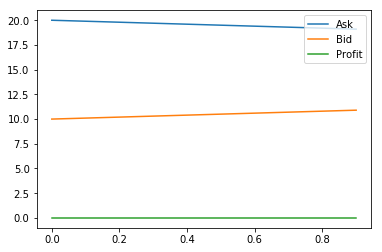

In [24]:
pi = 0.9
v_H = 20
v_L = 10

phi_f      = lambda c : ((1 - pi) * c - (1 - pi) * ((v_H - v_L) / 2)) / (pi * c - 2 * pi * ((v_H - v_L) / 2))
h_spread_f = lambda c : (phi_f(c) * pi * ((v_H - v_L) / 2)) / (1 - pi - phi_f(c) * pi)
ask_f      = lambda c : (v_H + v_L) / 2 + h_spread_f(c)
bid_f      = lambda c : (v_H + v_L) / 2 - h_spread_f(c)
profit_f   = lambda c : (v_H - v_L) / 2 - h_spread_f(c) - c

n_p    = 10
c      = [x / n_p for x in range(n_p)]
ask    = [ask_f(x) for x in c]
bid    = [bid_f(x) for x in c]
profit = [profit_f(x) for x in c]

import matplotlib.pyplot as ppt
print("c, Bid,   Ask,    Profit")
for x, a, b, p in zip(c, ask, bid, profit):
    print(f"{x:3.3f}, {b:5.2f}, {a:5.2f}, {p:5.2f}")
ppt.plot(c, list(zip(ask, bid, profit)))
ppt.legend(["Ask", "Bid", "Profit"])
ppt.show()

## Question 5

## Part A

\begin{align}
0 &= (1-\pi)\begin{cases} \frac{a-b}{2} & \frac{a-b}{2} \leq \delta \\ 0 \end{cases} - \pi \left(\frac{v^H - v^L}{2} - \frac{a-b}{2}\right) \\
\pi \left(\frac{v^H - v^L}{2} - a + \mu\right) &= (1-\pi)\begin{cases} a - \mu & a - \mu \leq \delta \\ 0 \end{cases}\\
\pi \left(\frac{v^H - v^L}{2}\right) - \pi a + \pi\mu &= \begin{cases} (1-\pi)a - (1-\pi)\mu & a - \mu \leq \delta \\ 0 \end{cases}\\
\pi\left(\frac{v^H - v^L}{2}\right) &= \begin{cases} a - \mu & a - \mu \leq \delta \\ \pi a - \pi \mu \end{cases} \\
\pi\left(\frac{v^H - v^L}{2}\right) &= (a - \mu) * \begin{cases} 1& a - \mu \leq \delta \\ \pi \end{cases} \\
\pi\left(\frac{v^H - v^L}{2}\right) &= a - \mu - (a - \mu) * \begin{cases} 0& a - \mu \leq \delta \\ 1-\pi \end{cases}  \\
a &= \mu +  \pi\left(\frac{v^H - v^L}{2}\right) + (a - \mu) * \begin{cases} 0& a - \mu \leq \delta \\ 1-\pi \end{cases} \\
b &= \mu - \pi\left(\frac{v^H - v^L}{2}\right) - (b - \mu) * \begin{cases} 0& b - \mu \leq \delta \\ 1-\pi \end{cases} 
\end{align}

### Part B

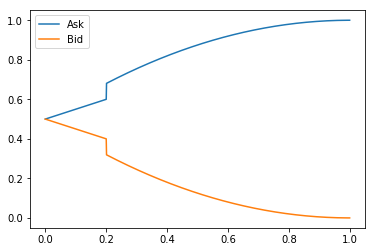

In [26]:
v_H = 1
v_L = 0
mu  = 0.5
delta = 0.1

h_spread_f = lambda pi : pi * (v_H - v_L) / 2
ask_f      = lambda pi: mu + h_spread_f(pi) + ((1 - pi) * h_spread_f(pi) if h_spread_f(pi) > delta else 0)
bid_f      = lambda pi: mu - h_spread_f(pi) - ((1 - pi) * h_spread_f(pi) if h_spread_f(pi) > delta else 0)

np   = 1000
pi_l = [x / np for x in range(np)]
ask  = [ask_f(x) for x in pi_l]
bid  = [bid_f(x) for x in pi_l]

ppt.plot(pi_l, list(zip(ask, bid)))
ppt.legend(["Ask", "Bid"])
ppt.show()

## Question 6

Expected profit from trading with a noise trader:
$$p_u = \frac{a - b}{2}$$
Expected profit from trading with an informed trader:
$$p_i = \frac{a - b}{2} - \begin{cases} 2a + 1 & v \geq a \\ 0 & b < v < a  \\\frac{b}{b + 2} & v \leq b \end{cases}$$
Given perfectly competitive markets:
\begin{align}
0 &= (1-\pi)\frac{a - b}{2} + \pi \left(\frac{a - b}{2} - \begin{cases} 2a + 1 & v \geq a \\ 0 & b < v < a  \\\frac{b}{b + 2} & v \leq b \end{cases}\right)\\
&= (1-\pi)\frac{a - b}{2} + \pi\frac{a - b}{2}  - \pi\begin{cases} 2a + 1 & v \geq a \\ 0 & b < v < a  \\\frac{b}{b + 2} & v \leq b \end{cases}\\
&= \frac{a-b}{2} - \pi\begin{cases} 2a + 1 & v \geq a \\ 0 & b < v < a  \\\frac{b}{b + 2} & v \leq b \end{cases}\\
&= a - \mu -  \pi\begin{cases} 2a + 1 & v \geq a \\ 0 &  v < a  \\\end{cases}\\
a &= \mu + \pi\begin{cases} 2a + 1 & v \geq a \\ 0 &  v < a  \\\end{cases}\\
&= \mu + F(a)\pi(2a + 1) \\
b &= \mu - (1-F(b))\pi\frac{b}{b + 2}
\end{align}

In [64]:
F = lambda x : (1 - (1 / (x + 1) ** 2))




def get_a(pi):
    ask_f = lambda x : 1 + F(x) * pi * (2 * a + 1)
    bid_f = lambda x : 1 - (1-F(x)) * pi * (x / (x + 1))
    a = 1
    e = 1e-20
    l = 0.1

    while abs(a-ask_f(a)) > e:
        if a > ask_f(a):
            a -= l
        else:
            a += l
        l = l - l/100
        if l < e:
            return float("inf")
    return a

def get_b(pi):
    ask_f = lambda x : 1 + F(x) * pi * (2 * a + 1)
    bid_f = lambda x : 1 - (1-F(x)) * pi * (x / (x + 1))
    b = 1
    e = 1e-20
    l = 0.1

    while abs(b-bid_f(b)) > e:
        if b > bid_f(b):
            b -= l
        else:
            b += l
        l = l - l/100
        if l < e:
            return float("-inf")
    return b
np = 100_000
prev = 1
print("Critical pi")
for x in range(int(np * 0.434), np):
    curr = get_a(x/np)
    if curr == float("inf"):
        print(prev)
        break
    prev = x/np
    # print(f"{x/np:5.3f}, {get_a(x/np):5.3f}, {get_b(x/np):5.3f}")



Critical pi
0.43782


## Question 7

The price pressure of inventory holdings scales with the illiquidity of the holdings. Thus small cap, illiquid stocks produce greater price pressure than large cap, liquid stocks.

## Question 8

### Part B

\begin{align}
p &= \kappa_l (1-\pi) \frac{a-b}{2} - \kappa_i\pi (0.5 - \frac{a-b}{2}) \\
0 &= \kappa_l (1-\pi) (a - 0.5) - \kappa_i\pi (0.5 - a + 0.5) \\
&= \kappa_l (1-\pi)a - \kappa_l (1-\pi) * 0.5 - \kappa_i\pi + \kappa_i\pi a \\
&= (\kappa_l (1-\pi) + \kappa_i\pi) a  - \kappa_l (1-\pi) * 0.5 - \kappa_i \pi\\
a &= \frac{\kappa_l (1-\pi) * 0.5 + \kappa_i \pi}{\kappa_l (1-\pi) + \kappa_i\pi} \\
&= \frac{\kappa (1-\pi) * 0.5 + \kappa \pi}{\kappa (1-\pi) + \kappa\pi}\\
&= (1-\pi) * 0.5 +  \pi \\
&= \mu + \pi \frac{v^H - v^L}{2}\\
b &= \mu - \pi \frac{v^H - v^L}{2}
\end{align}
If $k_i$ increases then the spread decreases, else it increases. This makes sense as fewer informed traders lead to a narrow spread. 

## Question 12

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("Ch3_ex12_data.xls")
data.head()

,ticker,pb,pa,p,vo,vp,ibnosh,gics,bas100,ami100,mktcap,ret,vola
0,AACC,6.376667,6.400000,6.393333,60.100000,3.831219e+02,30.573,40,0.368915,0.138675,195.463378,0.012650,0.058134
1,AAME,0.500333,0.644567,0.576556,5.333333,2.940111e+00,21.903,40,24.404827,2.314466,12.628297,0.038419,0.223454
2,AAPL,116.898750,116.975000,116.970000,18880.875000,2.199989e+06,890.554,20,0.065185,0.000100,104168.087500,0.007268,0.028199
3,AATI,4.091111,4.111111,4.108889,263.977778,1.105406e+03,42.891,20,0.491540,0.017150,176.234344,0.022492,0.036442
4,AAWW,20.101111,20.142222,20.133333,282.211111,5.661318e+03,21.062,20,0.203990,0.020136,424.048278,0.022644,0.062385


### Part A

In [11]:
data["spread"] = data["pa"] - data["pb"]
x = np.corrcoef(data[["p", "vp", "mktcap", "spread", "ret", "vola"]], rowvar=False)
for row in x:
    for v in row:
        print(f"{v:+6.4f} ", end="")
    print()

+1.0000 +0.4999 +0.3718 +0.1170 -0.0641 -0.2537 
+0.4999 +1.0000 +0.8923 -0.0150 -0.0138 -0.0815 
+0.3718 +0.8923 +1.0000 -0.0202 -0.0275 -0.0966 
+0.1170 -0.0150 -0.0202 +1.0000 -0.0416 +0.0289 
-0.0641 -0.0138 -0.0275 -0.0416 +1.0000 +0.3311 
-0.2537 -0.0815 -0.0966 +0.0289 +0.3311 +1.0000 


The most correlated values are market cap and trading volume. Be careful not to induce omitted variable bias.

### Part B

In [24]:
data["turnover"] = data["vo"] / data["ibnosh"]
data["l_vola"] = data["vola"].apply(np.log)

formulas = ["spread ~ vola + " for _ in range(6)]
formulas[0] += "mktcap"
formulas[1] += "vp"
formulas[2] += "np.log(mktcap)"
formulas[3] += "l_vola"
formulas[4] += "turnover"
formulas[5] += "turnover + np.log(p)"

import statsmodels.formula.api as sm

In [25]:
sm.ols(formulas[0], data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8616
Date:                Mon, 13 Apr 2020   Prob (F-statistic):              0.423
Time:                        14:14:32   Log-Likelihood:                 527.13
No. Observations:                1514   AIC:                            -1048.
Df Residuals:                    1511   BIC:                            -1032.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0707      0.009      8.262      0.000       0.054       0.088
vola           0.1540      0.146      1.053      0.293      -0.133       0.441
mktcap     -3.882e-07   5.72e-07     -0.679      0.497   -1.51e-06    7.33e-07
==============================================================================
Omnibus:                     1906.659   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241272.541
Skew:                           6.759   Prob(JB):                         0.00
Kurtosis:                      63.348   Cond. No.                     2.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
sm.ols(formulas[1], data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7522
Date:                Mon, 13 Apr 2020   Prob (F-statistic):              0.472
Time:                        14:14:33   Log-Likelihood:                 527.02
No. Observations:                1514   AIC:                            -1048.
Df Residuals:                    1511   BIC:                            -1032.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0705      0.009      8.234      0.000       0.054       0.087
vola           0.1578      0.146      1.079      0.281      -0.129       0.444
vp         -2.288e-08   4.65e-08     -0.492      0.622   -1.14e-07    6.82e-08
==============================================================================
Omnibus:                     1906.601   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241216.870
Skew:                           6.759   Prob(JB):                         0.00
Kurtosis:                      63.341   Cond. No.                     3.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
sm.ols(formulas[2], data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.35
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           3.13e-13
Time:                        14:14:33   Log-Likelihood:                 555.11
No. Observations:                1514   AIC:                            -1104.
Df Residuals:                    1511   BIC:                            -1088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1972      0.019     10.516      0.000       0.160       0.234
vola              -0.2471      0.153     -1.616      0.106      -0.547       0.053
np.log(mktcap)    -0.0206      0.003     -7.575      0.000      -0.026      -0.015
==============================================================================
Omnibus:                     1911.255   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           248788.377
Skew:                           6.776   Prob(JB):                         0.00
Kurtosis:                      64.320   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sm.ols(formulas[3], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.17
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.53e-05
Time:                        14:16:46   Log-Likelihood:                 536.03
No. Observations:                1512   AIC:                            -1066.
Df Residuals:                    1509   BIC:                            -1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2145      0.063     -3.428      0.001      -0.337      -0.092
vola           1.3561      0.297      4.570      0.000       0.774       1.938
l_vola        -0.0713      0.016     -4.576      0.000      -0.102      -0.041
==============================================================================
Omnibus:                     1922.264   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           254553.921
Skew:                           6.859   Prob(JB):                         0.00
Kurtosis:                      65.067   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sm.ols(formulas[4], data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.17
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           4.12e-05
Time:                        14:17:01   Log-Likelihood:                 536.38
No. Observations:                1514   AIC:                            -1067.
Df Residuals:                    1511   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0777      0.009      9.054      0.000       0.061       0.095
vola           0.1832      0.145      1.264      0.206      -0.101       0.467
turnover      -0.0011      0.000     -4.365      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1910.272   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244110.763
Skew:                           6.778   Prob(JB):                         0.00
Kurtosis:                      63.711   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
sm.ols(formulas[5], data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     22.16
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           4.80e-14
Time:                        14:17:05   Log-Likelihood:                 558.89
No. Observations:                1514   AIC:                            -1110.
Df Residuals:                    1510   BIC:                            -1088.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0103      0.013      0.787      0.431      -0.015       0.036
vola           0.6449      0.158      4.074      0.000       0.334       0.955
turnover      -0.0014      0.000     -5.657      0.000      -0.002      -0.001
np.log(p)      0.0265      0.004      6.750      0.000       0.019       0.034
==============================================================================
Omnibus:                     1894.980   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237768.376
Skew:                           6.684   Prob(JB):                         0.00
Kurtosis:                      62.920   Cond. No.                         714.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
formulas = ["ami100 ~ vola + " for _ in range(6)]
formulas[0] += "mktcap"
formulas[1] += "vp"
formulas[2] += "np.log(mktcap)"
formulas[3] += "l_vola"
formulas[4] += "turnover"
formulas[5] += "turnover + np.log(p)"

In [37]:
sm.ols(formulas[0], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.79
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           4.70e-10
Time:                        14:18:12   Log-Likelihood:                -2473.7
No. Observations:                1512   AIC:                             4953.
Df Residuals:                    1509   BIC:                             4969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0477      0.062      0.765      0.445      -0.075       0.170
vola           6.7531      1.066      6.332      0.000       4.661       8.845
mktcap     -5.158e-06   4.16e-06     -1.241      0.215   -1.33e-05       3e-06
==============================================================================
Omnibus:                     2048.488   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420909.886
Skew:                           7.529   Prob(JB):                         0.00
Kurtosis:                      83.339   Cond. No.                     2.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
sm.ols(formulas[1], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     22.34
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.75e-10
Time:                        14:18:19   Log-Likelihood:                -2473.2
No. Observations:                1512   AIC:                             4952.
Df Residuals:                    1509   BIC:                             4968.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0513      0.062      0.822      0.411      -0.071       0.174
vola           6.7404      1.065      6.331      0.000       4.652       8.829
vp         -5.455e-07   3.38e-07     -1.615      0.106   -1.21e-06    1.17e-07
==============================================================================
Omnibus:                     2048.863   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421467.063
Skew:                           7.531   Prob(JB):                         0.00
Kurtosis:                      83.393   Cond. No.                     3.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
sm.ols(formulas[2], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     88.71
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           3.78e-37
Time:                        14:18:23   Log-Likelihood:                -2411.2
No. Observations:                1512   AIC:                             4828.
Df Residuals:                    1509   BIC:                             4844.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4203      0.134     10.569      0.000       1.157       1.684
vola               2.3582      1.092      2.160      0.031       0.216       4.500
np.log(mktcap)    -0.2237      0.019    -11.478      0.000      -0.262      -0.185
==============================================================================
Omnibus:                     2058.855   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456993.827
Skew:                           7.565   Prob(JB):                         0.00
Kurtosis:                      86.815   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
sm.ols(formulas[3], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     21.28
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.66e-10
Time:                        14:18:30   Log-Likelihood:                -2474.2
No. Observations:                1512   AIC:                             4954.
Df Residuals:                    1509   BIC:                             4970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3049      0.458     -0.666      0.506      -1.203       0.594
vola           8.3003      2.173      3.820      0.000       4.038      12.562
l_vola        -0.0853      0.114     -0.748      0.454      -0.309       0.138
==============================================================================
Omnibus:                     2048.463   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420060.081
Skew:                           7.530   Prob(JB):                         0.00
Kurtosis:                      83.255   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
sm.ols(formulas[4], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     33.98
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           3.69e-15
Time:                        14:18:37   Log-Likelihood:                -2461.9
No. Observations:                1512   AIC:                             4930.
Df Residuals:                    1509   BIC:                             4946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1016      0.063      1.626      0.104      -0.021       0.224
vola           7.0429      1.054      6.684      0.000       4.976       9.110
turnover      -0.0091      0.002     -5.026      0.000      -0.013      -0.006
==============================================================================
Omnibus:                     2056.778   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430276.072
Skew:                           7.581   Prob(JB):                         0.00
Kurtosis:                      84.240   Cond. No.                         643.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
sm.ols(formulas[5], data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     23.13
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.22e-14
Time:                        14:18:42   Log-Likelihood:                -2461.2
No. Observations:                1512   AIC:                             4930.
Df Residuals:                    1508   BIC:                             4952.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1899      0.097      1.962      0.050    3.97e-05       0.380
vola           6.4369      1.169      5.505      0.000       4.143       8.731
turnover      -0.0087      0.002     -4.698      0.000      -0.012      -0.005
np.log(p)     -0.0345      0.029     -1.194      0.232      -0.091       0.022
==============================================================================
Omnibus:                     2056.461   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           429910.948
Skew:                           7.579   Prob(JB):                         0.00
Kurtosis:                      84.205   Cond. No.                         716.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
data["fin"] = pd.get_dummies(data["gics"])[40]
sm.ols(formulas[3] + " + fin", data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     35.68
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.82e-22
Time:                        14:25:30   Log-Likelihood:                -2443.4
No. Observations:                1512   AIC:                             4895.
Df Residuals:                    1508   BIC:                             4916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1014      0.450     -0.225      0.822      -0.984       0.781
vola           6.4719      2.142      3.021      0.003       2.270      10.674
l_vola        -0.0104      0.112     -0.093      0.926      -0.230       0.210
fin            0.6290      0.079      7.920      0.000       0.473       0.785
==============================================================================
Omnibus:                     2072.817   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473049.769
Skew:                           7.654   Prob(JB):                         0.00
Kurtosis:                      88.290   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
sm.ols(formulas[4] + " + fin", data.replace([np.inf, -np.inf], np.nan).dropna()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     42.49
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.35e-26
Time:                        14:25:38   Log-Likelihood:                -2433.9
No. Observations:                1512   AIC:                             4876.
Df Residuals:                    1508   BIC:                             4897.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.063      0.037      0.971      -0.121       0.125
vola           6.4670      1.037      6.234      0.000       4.432       8.502
turnover      -0.0078      0.002     -4.367      0.000      -0.011      -0.004
fin            0.5964      0.079      7.549      0.000       0.441       0.751
==============================================================================
Omnibus:                     2079.300   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           480755.833
Skew:                           7.696   Prob(JB):                         0.00
Kurtosis:                      88.989   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg = sm.ols(formulas[5] + " + fin", data.replace([np.inf, -np.inf], np.nan).dropna()).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.26e-27
Time:                        14:27:52   Log-Likelihood:                -2430.7
No. Observations:                1512   AIC:                             4871.
Df Residuals:                    1507   BIC:                             4898.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1823      0.095      1.922      0.055      -0.004       0.368
vola           5.1590      1.158      4.456      0.000       2.888       7.430
turnover      -0.0068      0.002     -3.740      0.000      -0.010      -0.003
np.log(p)     -0.0727      0.029     -2.527      0.012      -0.129      -0.016
fin            0.6304      0.080      7.880      0.000       0.473       0.787
==============================================================================
Omnibus:                     2079.987   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483087.654
Skew:                           7.699   Prob(JB):                         0.00
Kurtosis:                      89.203   Cond. No.                         723.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The impact of $fin$ appears positive, indicating financial stocks were less liquid.

### Part E

In [81]:
inv = lambda c : 1-c
data["nfin"] = data["fin"].apply(inv)

reg = sm.ols("spread ~ fin + nfin + vola:fin + vola:nfin + turnover:fin + turnover:nfin + np.log(p):fin + np.log(p):nfin - 1", 
             data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     43.90
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.05e-56
Time:                        14:40:59   Log-Likelihood:                 666.85
No. Observations:                1514   AIC:                            -1318.
Df Residuals:                    1506   BIC:                            -1275.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fin                0.0033      0.035      0.094      0.925      -0.065       0.072
nfin               0.0269      0.013      2.011      0.044       0.001       0.053
vola:fin           1.4296      0.305      4.684      0.000       0.831       2.028
vola:nfin          0.2226      0.174      1.280      0.201      -0.118       0.564
turnover:fin      -0.0099      0.001     -8.596      0.000      -0.012      -0.008
turnover:nfin     -0.0006      0.000     -2.467      0.014      -0.001      -0.000
np.log(p):fin      0.0762      0.011      7.140      0.000       0.055       0.097
np.log(p):nfin     0.0109      0.004      2.742      0.006       0.003       0.019
==============================================================================
Omnibus:                     1851.623   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           231906.399
Skew:                           6.395   Prob(JB):                         0.00
Kurtosis:                      62.267   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
hypothesis = "(vola:fin = vola:nfin)"
reg.f_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[11.80821715]]), p=0.000605737283498603, df_denom=1.51e+03, df_num=1>

In [83]:
hypothesis = "(turnover:fin = turnover:nfin)"
reg.f_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[62.50863367]]), p=5.088683210731206e-15, df_denom=1.51e+03, df_num=1>

In [84]:
hypothesis = "(np.log(p):fin = np.log(p):nfin)"
reg.f_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[32.96022594]]), p=1.1356962949105402e-08, df_denom=1.51e+03, df_num=1>

In [85]:
hypothesis = "(vola:fin = vola:nfin), (turnover:fin = turnover:nfin), (np.log(p):fin = np.log(p):nfin)"
reg.f_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[28.93117199]]), p=3.469463998723971e-18, df_denom=1.51e+03, df_num=3>

# Chapter 4

## Question 1

### Part A

The parameter $\lambda$ is derived:
\begin{align}
p(q) &= \mu + \frac{cov(v, q)}{var(q)} q\\
&= \mu + \frac{\beta\sigma_v^2}{\beta (\sigma_v^2 +\sigma_\eta^2)+ \sigma_u^2}q
\end{align}
An increase in the informed investors error increases $\sigma_\eta^2$, increasing market depth. Shifting the response curve up and to the left.

### Part B

\begin{align}
E[v|s] &= \mu + \frac{cov(v, s)}{var(s)} (s-\mu) \\
&= \mu + \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\nu^2}
\end{align}
The investor wishes to maximise his value:
\begin{align}
\underset{x}{max}\ E[x*(v-p)|s] &= \underset{x}{max}\ xE[v-p|s] \\
&= \underset{x}{max}\ x(E[v|s] - \mu - \lambda x)\\
&= \underset{x}{max}\ x(\mu + \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}(s-\mu) - \mu - \lambda x)\\
&= \underset{x}{max}\ x(\frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}(s-\mu)- \lambda x)\\
0 &\equiv \frac{d}{dx} x(\frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}(s-\mu)- \lambda x)\\
&= \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}(s-\mu) - 2\lambda x \\
x &= \frac{1}{2 \lambda}  \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}(s-\mu) \\
\beta &=  \frac{1}{2 \lambda}  \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2}
\end{align}
Thus beta is decreasing in $\sigma_\eta^2$

### Part C

\begin{align}
\lambda &= \frac{\beta\sigma_v^2}{\beta (\sigma_v^2 +\sigma_\eta^2)+ \sigma_u^2} \\
\beta &=  \frac{1}{2 \lambda}  \frac{\sigma_v^2}{\sigma_v^2 + \sigma_\eta^2} \\
&= 

\end{align}

